# Init

In [8]:
import numpy as np

import ART as art

import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', size=20)
p_style = ["D","x","o","s","h","^","v"]
l_style = ["-","--",":","-.",(0, (7, 2, 3, 2))]
color = ["k","r","b","g","m","y","c","tab:gray", "tab:orange", "tab:pink", "tab:purple", "tab:brown"]

### Read radiative coefficients from pickled file

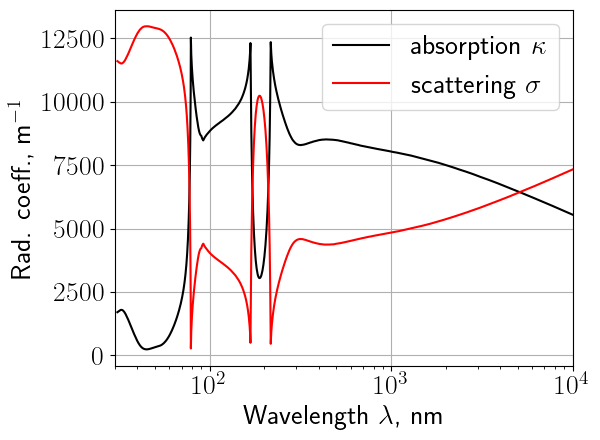

In [9]:
import pickle

with open("emissivity_real.pkl", "rb") as f:
    loaded_data = pickle.load(f)

A1s = []
A1s.append(loaded_data["A1s0"])
A1s.append(loaded_data["A1s1"])

lams_FiberForm = loaded_data["lams_FiberForm"]
eps_FiberForm_iso = loaded_data["eps_FiberForm_iso"]
eps_FiberForm_HG = []
eps_FiberForm_HG.append(loaded_data["eps_FiberForm_HG0"])
eps_FiberForm_HG.append(loaded_data["eps_FiberForm_HG1"])
sigmas_FiberForm = loaded_data["sigmas_FiberForm"]
kappas_FiberForm = loaded_data["kappas_FiberForm"]


plt.plot(lams_FiberForm, kappas_FiberForm, l_style[0]+color[0], label="absorption $\\kappa$")
plt.plot(lams_FiberForm, sigmas_FiberForm, l_style[0]+color[1], label="scattering $\\sigma$")
plt.xscale("log")
plt.xlabel('Wavelength $\lambda$, nm')
plt.ylabel('Rad. coeff., m$^{-1}$')
plt.legend()
plt.grid()
plt.xlim(30,10000)
plt.tight_layout()

# Calculate spectral emissivity as function of scattering albedo using ART model

In [11]:
# calculater scattering albedos
FiberForm_albedos = [s/(s+k) for s,k in zip(sigmas_FiberForm,kappas_FiberForm)]

# calculate emissivities using ART model
# 	using isotropic scattering phase function
eps_FiberForm_iso_Bezier = art.calc_emissivity_bezier(FiberForm_albedos)
# 	using Henyey-Greenstein scattering phase function with g1 = A1s[0] and g1 = A1s[1]
eps_FiberForm_HG_Bezier = []
eps_FiberForm_HG_Bezier.append(art.calc_emissivity_bezier(FiberForm_albedos, SF="HG", g1=A1s[0]))
eps_FiberForm_HG_Bezier.append(art.calc_emissivity_bezier(FiberForm_albedos, SF="HG", g1=A1s[1]))

## Plot

/tmp/ipykernel_6608/1357502627.py:39: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,6000)


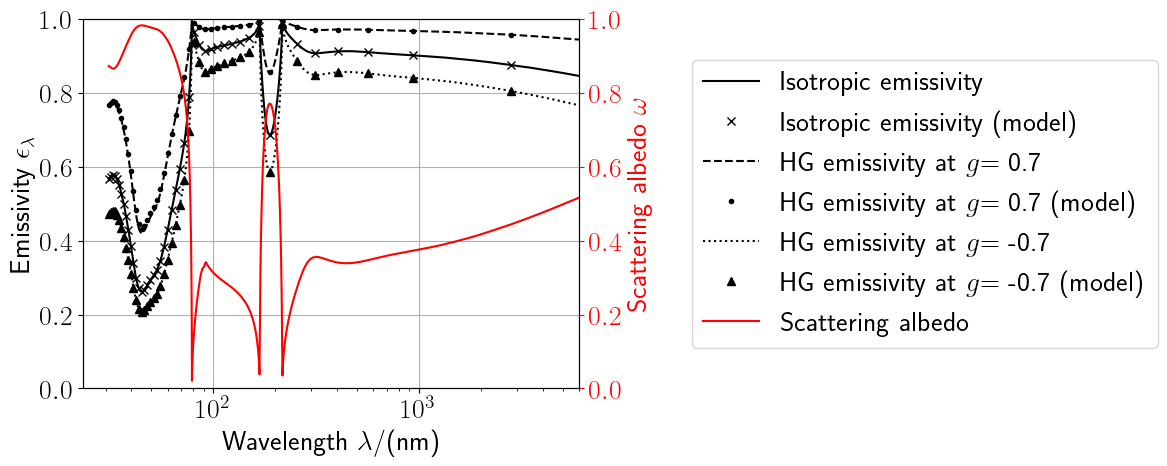

In [20]:
# Create the first plot
fig, ax1 = plt.subplots()


plt.plot(lams_FiberForm, eps_FiberForm_iso, 
         l_style[0]+color[0],
         label="Isotropic emissivity")
plt.plot(lams_FiberForm, eps_FiberForm_iso_Bezier, 
         markevery=22, color=color[0], linestyle=" ", marker="x", 
         label="Isotropic emissivity (model)")

plt.plot(lams_FiberForm, eps_FiberForm_HG[0], 
         l_style[1]+color[0], 
         label="HG emissivity at $g$= "+str(A1s[0]))
plt.plot(lams_FiberForm, eps_FiberForm_HG_Bezier[0], 
         markevery=22, color=color[0], linestyle=" ", marker=".", 
         label="HG emissivity at $g$= "+str(A1s[0])+" (model)")

plt.plot(lams_FiberForm, eps_FiberForm_HG[1], 
         l_style[2]+color[0], 
         label="HG emissivity at $g$= "+str(A1s[1]))
plt.plot(lams_FiberForm, eps_FiberForm_HG_Bezier[1], 
         markevery=22, color=color[0], linestyle=" ", marker="^", 
         label="HG emissivity at $g$= "+str(A1s[1])+" (model)")

plt.xscale("log")
ax1.set_xlabel("Wavelength $\\lambda$/(nm)")
ax1.set_ylabel('Emissivity $\\epsilon_{\lambda}$')
ax1.tick_params('y', colors='k')
plt.grid()
plt.ylim(0,1)

# Create the second plot with the twinx() function
ax2 = ax1.twinx()
ax2.plot(lams_FiberForm, FiberForm_albedos, 'r-', label="Scattering albedo")
ax2.set_ylabel('Scattering albedo $\\omega$', color='r')
ax2.tick_params('y', colors='r')
plt.ylim(0,1)
plt.xlim(0,6000)

# Combine the legend handles and labels from both axes
handles, labels = [], []
for ax in [ax1, ax2]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1.2, 0.5), ncol=1)

# Calculate total emissivity as function of temperature using ART model

## Using pre-calculated spectral emissivity

wavelength = [31.027, 10332.0] nm


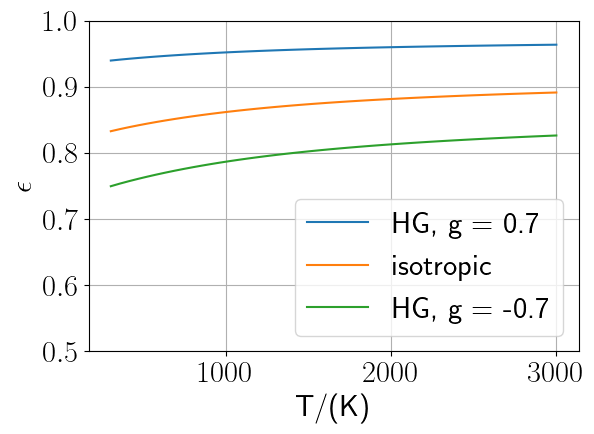

In [25]:
eps_li900_list = [eps_FiberForm_HG_Bezier[0], eps_FiberForm_iso_Bezier, eps_FiberForm_HG_Bezier[1]]
labels = [f"HG, g =  {A1s[0]}", "isotropic", f"HG, g = {A1s[1]}"]

print(f"wavelength = [{lams_FiberForm[0]}, {lams_FiberForm[-1]}] nm")

T_range = np.linspace(300, 3000, 50)

plt.rc('text', usetex=True)
plt.rc('font', size=22) # axes labels

total_eps_li900 = []
for i, eps_li900 in enumerate(eps_li900_list):
	total_eps_li900.append(art.calc_total_emissivity_from_epsilon(
												  	np.array(lams_FiberForm)*1e-3,  # convert nm to microns 
												  	T_range,
													eps_li900, 
													))
	plt.plot(T_range, total_eps_li900[i], label=labels[i])
    
plt.xlabel("T/(K)")
plt.ylabel("$\epsilon$")
plt.grid()
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.tight_layout()

## Using scattering albedo

wavelength = [31.027, 10332.0] nm


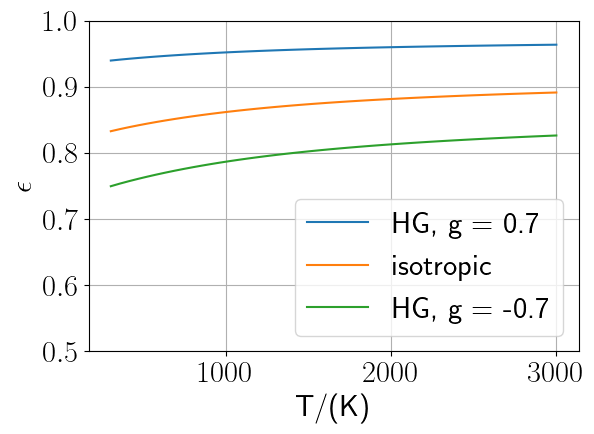

In [26]:
eps_li900_list = [eps_FiberForm_HG_Bezier[0], eps_FiberForm_iso_Bezier, eps_FiberForm_HG_Bezier[1]]
labels = [f"HG, g =  {A1s[0]}", "isotropic", f"HG, g = {A1s[1]}"]

print(f"wavelength = [{lams_FiberForm[0]}, {lams_FiberForm[-1]}] nm")

T_range = np.linspace(300, 3000, 50)

plt.rc('text', usetex=True)
plt.rc('font', size=22) # axes labels

total_eps_li900 = []
for i, eps_li900 in enumerate(eps_li900_list):
	total_eps_li900.append(art.calc_total_emissivity_from_epsilon(
												  	np.array(lams_FiberForm)*1e-3,  # convert nm to microns 
												  	T_range,
													eps_li900, 
													))
	plt.plot(T_range, total_eps_li900[i], label=labels[i])
    
plt.xlabel("T/(K)")
plt.ylabel("$\epsilon$")
plt.grid()
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.tight_layout()